In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.search_algorithm import TieBreak, ReexploreLevel
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)

import numpy as np

np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)

In [2]:
cg = ContactGraph.load_from_file(ContactGraphGeneratorParams.graph_file_path_from_name("cg_trichal2"))

INFO:large_gcs.graph.contact_graph:Loading 20 contact pair modes for 3 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 179 sets...
100%|██████████| 179/179 [00:00<00:00, 698.89it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 181/181 [00:00<00:00, 8689.43it/s]
INFO:large_gcs.graph.graph:Adding 181 vertices to graph...
100%|██████████| 181/181 [00:00<00:00, 6691.66it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 6408/6408 [00:00<00:00, 7813.45it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 6408/6408 [00:01<00:00, 5406.14it/s]
INFO:large_gcs.graph.graph:Adding 6408 edges to graph...
100%|██████████| 6408/6408 [00:01<00:00, 4834.61it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 18), n_vertices=181, n_edges=6408, source=[array([3.250, 0.000]), array([1.500, 0.500])], target=[array([-1.500, 0.000]), array([-3,  0])], work

INFO:large_gcs.algorithms.gcs_astar_convex_restriction:Running GcsAstarConvexRestriction, should_rexplore: True, use_convex_relaxation: False, shortcut_edge_cost_factory: contact_shortcut_edge_cost_factory_over_obj_weighted
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 2, n_edges_visited: 0, n_vertices_explored: 0, vertex_coverage: 0.011, edge_coverage: 0, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node source's 1 neighbors (0)
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 3, n_edges_visited: 1, n_vertices_explored: 1, vertex_coverage: 0.0166, edge_coverage: 0.0002, time_wall_clock: 0.00607, n_gcs_solves: 1, gcs_solve_time_total: 0.00218, gcs_solve_time_iter_mean: 0.00218, gcs_solve_time_last_10_mean:

INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 4, n_edges_visited: 2, n_vertices_explored: 56, vertex_coverage: 0.0221, edge_coverage: 0.0003, time_wall_clock: 4.2, n_gcs_solves: 56, gcs_solve_time_total: 0.0513, gcs_solve_time_iter_mean: 0.000916, gcs_solve_time_last_10_mean: 0.000678, gcs_solve_time_iter_std: 0.00131, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.01, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node ('NC|obs0_f0-obj0_v3', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')'s 63 neighbors (2271.4988106693536)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpu6rq3p4s/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 5, n_edges_visited: 2, n_vertices_explored: 118, vertex_coverage: 0.0276, edge_coverage: 0.0003, time_wall_clock: 10.4, n_gcs_solves: 118, gcs_solve_time_total: 0.165, gcs_solve_time_iter_mean: 0.0014, gcs_solve_time_last_10_mean: 0.000871, gcs_solve_time_iter_std: 0.00287, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0214, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node ('NC|obs0_f0-obj0_v3', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f0-rob0_v1')'s 43 neighbors (2271.664513882651)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpjz7j_xb5/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 5, n_edges_visited: 3, n_vertices_explored: 159, vertex_coverage: 0.0276, edge_coverage: 0.0005, time_wall_clock: 16.3, n_gcs_solves: 160, gcs_solve_time_total: 0.213, gcs_solve_time_iter_mean: 0.00133, gcs_solve_time_last_10_mean: 0.000825, gcs_solve_time_iter_std: 0.00254, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0214, n_vertices_revisited: 1, n_vertices_reexplored: 1
now exploring node ('NC|obs0_f0-obj0_v3', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')'s 63 neighbors (2272.498810672679)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpedl7102v/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 5, n_edges_visited: 3, n_vertices_explored: 220, vertex_coverage: 0.0276, edge_coverage: 0.0005, time_wall_clock: 22.9, n_gcs_solves: 221, gcs_solve_time_total: 0.357, gcs_solve_time_iter_mean: 0.00162, gcs_solve_time_last_10_mean: 0.00112, gcs_solve_time_iter_std: 0.0033, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0288, n_vertices_revisited: 2, n_vertices_reexplored: 1
now exploring node ('NC|obs0_f0-obj0_v3', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f0-rob0_v1')'s 43 neighbors (2272.664513924442)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmprnxbbsy7/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 6, n_edges_visited: 2, n_vertices_explored: 261, vertex_coverage: 0.0331, edge_coverage: 0.0003, time_wall_clock: 28.6, n_gcs_solves: 262, gcs_solve_time_total: 0.414, gcs_solve_time_iter_mean: 0.00158, gcs_solve_time_last_10_mean: 0.00116, gcs_solve_time_iter_std: 0.00306, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0288, n_vertices_revisited: 2, n_vertices_reexplored: 1
now exploring node ('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')'s 67 neighbors (2272.67373811279)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmp2n04ag9l/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 7, n_edges_visited: 3, n_vertices_explored: 325, vertex_coverage: 0.0387, edge_coverage: 0.0005, time_wall_clock: 32.9, n_gcs_solves: 328, gcs_solve_time_total: 0.489, gcs_solve_time_iter_mean: 0.00149, gcs_solve_time_last_10_mean: 0.000884, gcs_solve_time_iter_std: 0.00277, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0288, n_vertices_revisited: 2, n_vertices_reexplored: 3
now exploring node ('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')'s 67 neighbors (663.3809119600191)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmppvx892g5/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 8, n_edges_visited: 4, n_vertices_explored: 390, vertex_coverage: 0.0442, edge_coverage: 0.0006, time_wall_clock: 39.2, n_gcs_solves: 394, gcs_solve_time_total: 0.666, gcs_solve_time_iter_mean: 0.00169, gcs_solve_time_last_10_mean: 0.00141, gcs_solve_time_iter_std: 0.00333, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0313, n_vertices_revisited: 2, n_vertices_reexplored: 4
now exploring node ('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')'s 35 neighbors (345.1140408416758)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpl9dhux2v/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 9, n_edges_visited: 5, n_vertices_explored: 423, vertex_coverage: 0.0497, edge_coverage: 0.0008, time_wall_clock: 45.8, n_gcs_solves: 427, gcs_solve_time_total: 0.949, gcs_solve_time_iter_mean: 0.00222, gcs_solve_time_last_10_mean: 0.0107, gcs_solve_time_iter_std: 0.0051, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0617, n_vertices_revisited: 2, n_vertices_reexplored: 4
now exploring node ('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')'s 25 neighbors (257.2943121790773)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpswdces8d/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 10, n_edges_visited: 6, n_vertices_explored: 445, vertex_coverage: 0.0552, edge_coverage: 0.0009, time_wall_clock: 53, n_gcs_solves: 449, gcs_solve_time_total: 1.48, gcs_solve_time_iter_mean: 0.00329, gcs_solve_time_last_10_mean: 0.0264, gcs_solve_time_iter_std: 0.00824, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0936, n_vertices_revisited: 2, n_vertices_reexplored: 4
now exploring node ('NC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')'s 35 neighbors (61.322835810568215)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpup6mdizy/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 11, n_edges_visited: 7, n_vertices_explored: 476, vertex_coverage: 0.0608, edge_coverage: 0.0011, time_wall_clock: 61.1, n_gcs_solves: 481, gcs_solve_time_total: 1.88, gcs_solve_time_iter_mean: 0.0039, gcs_solve_time_last_10_mean: 0.0121, gcs_solve_time_iter_std: 0.00873, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0936, n_vertices_revisited: 2, n_vertices_reexplored: 5
now exploring node ('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')'s 23 neighbors (34.34977163893447)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpxe1dulg1/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 12, n_edges_visited: 7, n_vertices_explored: 498, vertex_coverage: 0.0663, edge_coverage: 0.0011, time_wall_clock: 69, n_gcs_solves: 503, gcs_solve_time_total: 2.41, gcs_solve_time_iter_mean: 0.00479, gcs_solve_time_last_10_mean: 0.0243, gcs_solve_time_iter_std: 0.00987, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0936, n_vertices_revisited: 2, n_vertices_reexplored: 5
now exploring node ('NC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')'s 49 neighbors (34.34977163893592)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpzfatpt86/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 13, n_edges_visited: 8, n_vertices_explored: 542, vertex_coverage: 0.0718, edge_coverage: 0.0012, time_wall_clock: 77, n_gcs_solves: 549, gcs_solve_time_total: 3.08, gcs_solve_time_iter_mean: 0.00561, gcs_solve_time_last_10_mean: 0.012, gcs_solve_time_iter_std: 0.0104, gcs_solve_time_iter_min: 0.000429, gcs_solve_time_iter_max: 0.0936, n_vertices_revisited: 2, n_vertices_reexplored: 7
now exploring node ('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')'s 45 neighbors (34.98440337798759)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmp_oxkxmiz/temp.m4v


INFO:large_gcs.algorithms.gcs_astar_convex_restriction:Convex Restriction Gcs A* complete! 
cost: 37.170682254815375, time: 0.01401376724243164
vertex path: ['source'
 "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')"
 "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')"
 "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"
 "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"
 "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"
 "('NC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')"
 "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')"
 "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')"
 "('NC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')"
 'target']
n_vertices_visited: 13, n_edges_visited: 8, n_vertices_explored: 584, vertex_coverage: 0.0718, edge_coverage: 0.0012, time_wall_clock: 88.7, n_gcs_solves: 592, gcs_solve_time_total: 7.22, gcs_

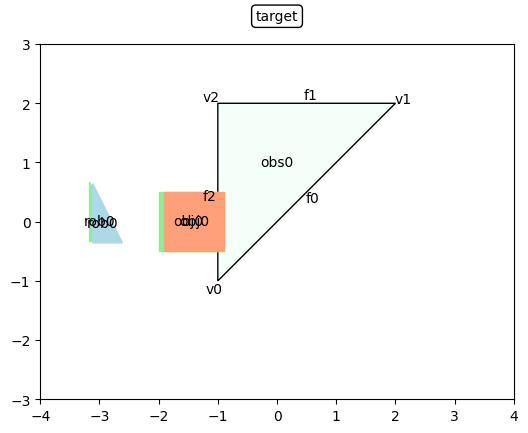

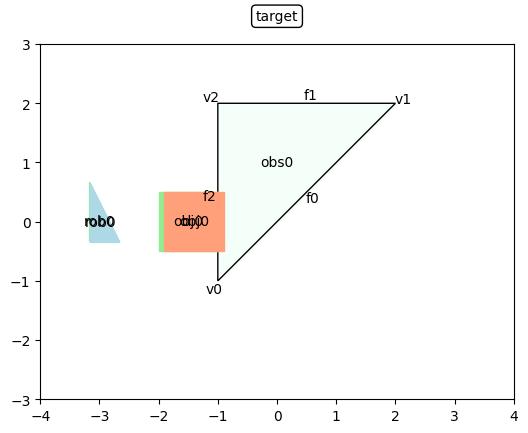

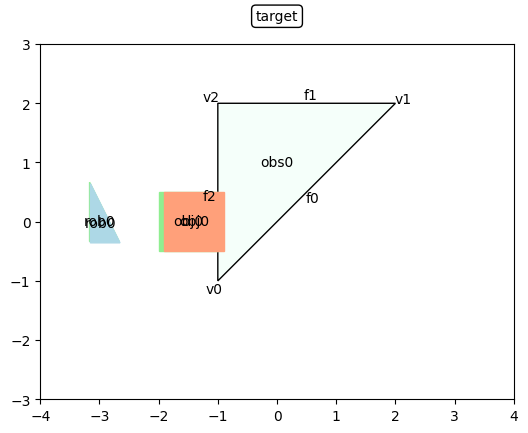

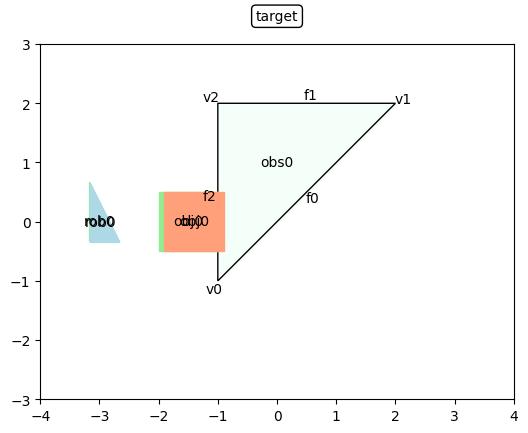

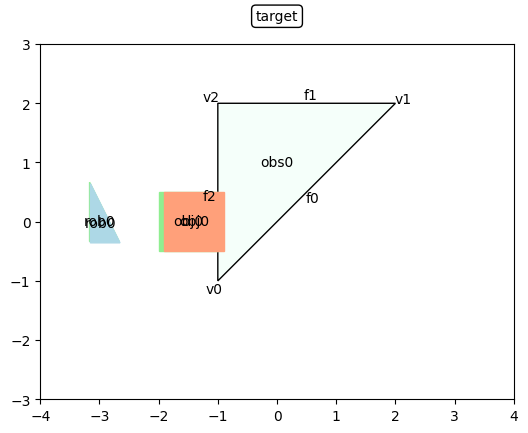

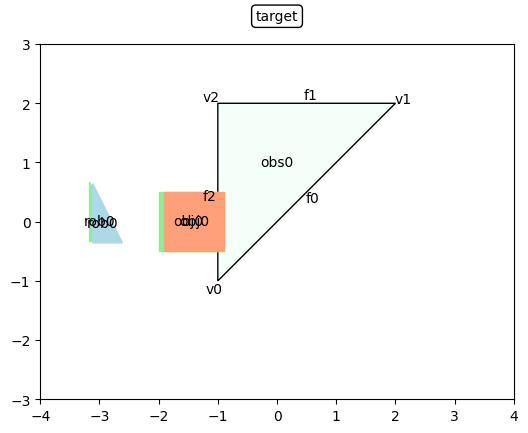

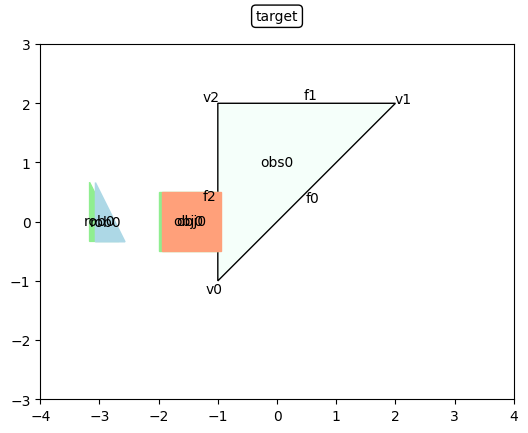

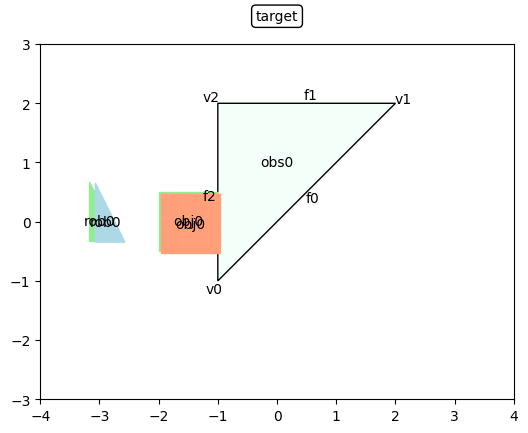

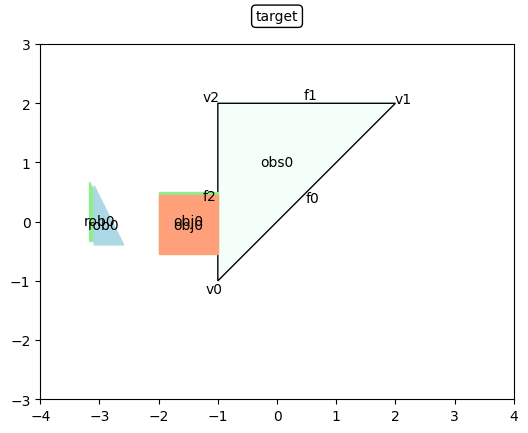

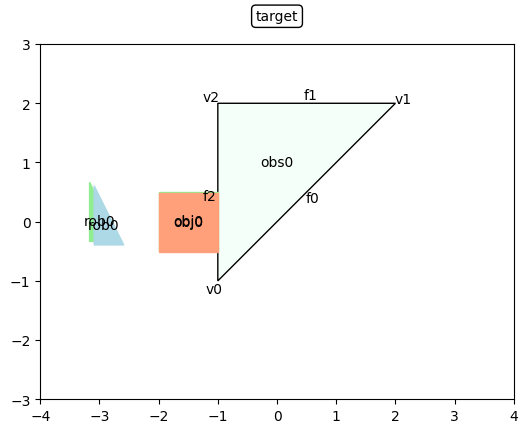

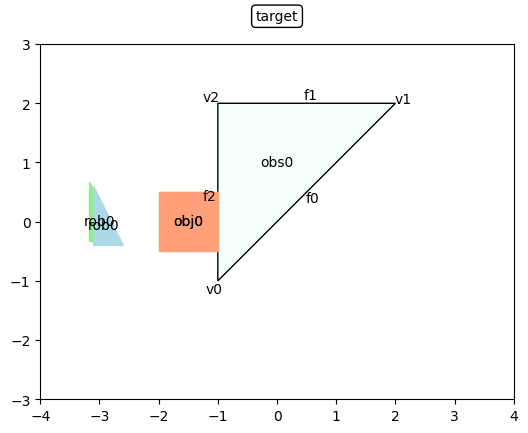

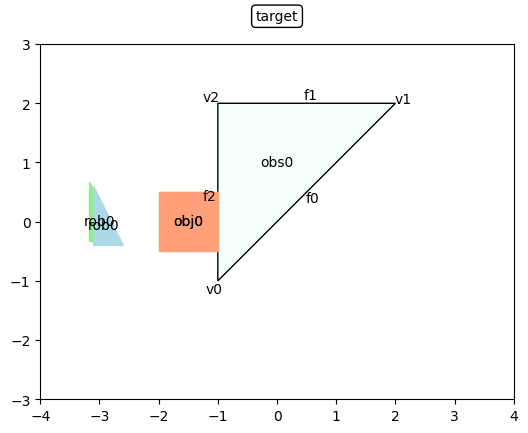

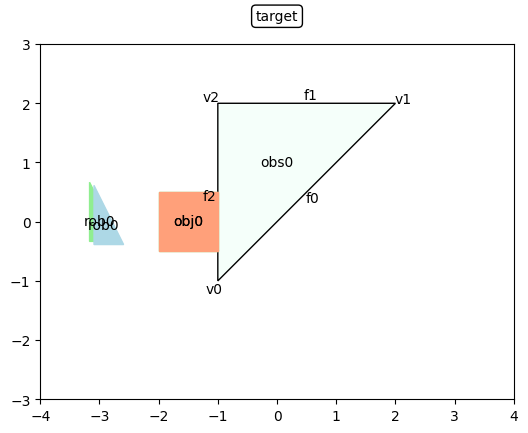

In [3]:
gcs_astar = GcsAstarConvexRestriction(
    cg,
    reexplore_level=ReexploreLevel.NONE,
    shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted,
    tiebreak=TieBreak.FIFO,
)
sol = gcs_astar.run(animate_intermediate=True)